## Histograms are a great way to visualize individual color components

In [1]:
import cv2
import numpy as np

# We need to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt

In [11]:
image = cv2.imread('DATA/cat.jpeg')
image

array([[[16, 15, 11],
        [23, 22, 18],
        [31, 30, 26],
        ...,
        [ 7,  8,  6],
        [ 7,  8,  6],
        [ 7,  8,  6]],

       [[15, 14, 10],
        [22, 21, 17],
        [30, 29, 25],
        ...,
        [ 6,  7,  5],
        [ 6,  7,  5],
        [ 6,  7,  5]],

       [[14, 13,  9],
        [21, 20, 16],
        [30, 29, 25],
        ...,
        [ 6,  7,  5],
        [ 6,  7,  5],
        [ 6,  7,  5]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [ 7,  7,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [12]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

In [4]:
cv2.calcHist?

In [5]:
histogram

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [13]:
image.ravel()

array([16, 15, 11, ...,  0,  0,  0], dtype=uint8)

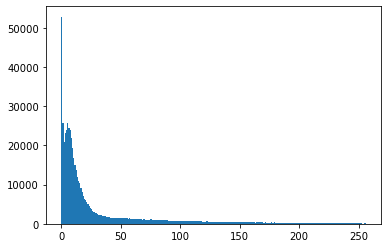

In [14]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

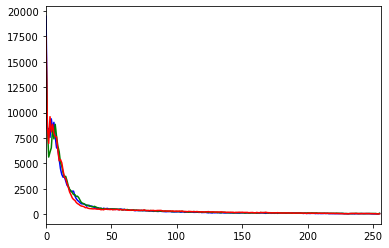

In [15]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

In [16]:
import cv2
import numpy as nprain

# We need to import matplotlib to create our histogram plots
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
image = cv2.imread('DATA/tobago.jpg')

In [18]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

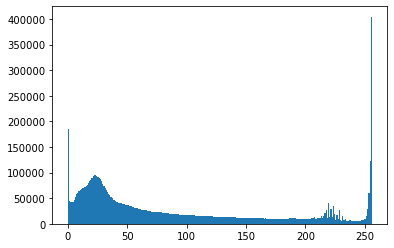

In [19]:
# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

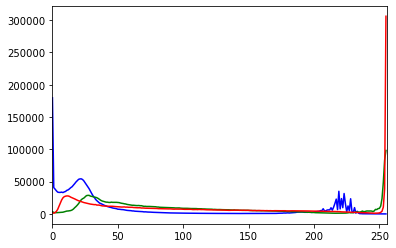

In [20]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

In [21]:
image = cv2.imread('DATA/tobago.jpg')
cv2.imshow("Tobago", image) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Masking

We can mask only certain parts of the image.

In [22]:
rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

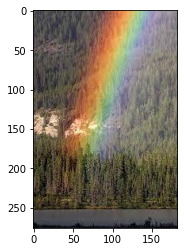

In [23]:
plt.imshow(show_rainbow)

In [24]:
cv2.imshow("im", show_rainbow)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
img = rainbow

In [26]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

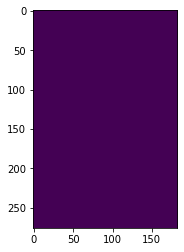

In [27]:
plt.imshow(mask)

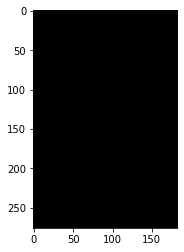

In [28]:
plt.imshow(mask,cmap='gray')

In [29]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

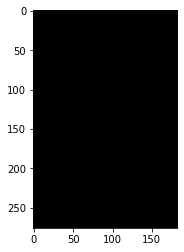

In [30]:
plt.imshow(show_masked_img)

In [31]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

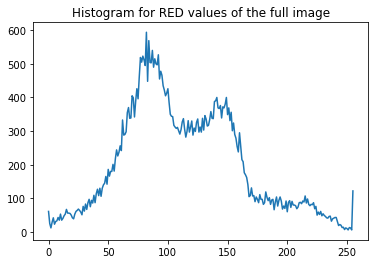

In [32]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

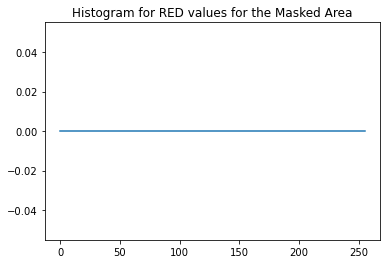

In [33]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')